In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dfTrain = pd.read_csv('fraud_train.csv')
pd.set_option('display.max_columns', None)
dfTrain.head()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
0,4676,2457646,2457726,111,-2,1798,2605127,26,10,2200000.0,96,5,265,4137,613,193955,4,2,1,9,False,3,999,1.332293e+06,9750000.0,10000.0,2.73,0
1,788,2457419,2457507,111,-2,1798,-3,156,12,2500000.0,96,5,121,1264,2196,73140,2,1,5,8,False,3,999,1.369048e+06,10000000.0,30000.0,2.33,1
2,1520,2457521,2457612,2,-2,1798,-3,156,12,1200000.0,96,5,101,1283,2049,140216,3,1,5,8,False,3,999,1.552346e+07,100000000.0,41804.0,2.40,0
3,9346,2457659,2457746,103,75336,249,2806174,58,6,320000.0,96,5,239,7049,588,155117,3,2,2,4,False,3,999,7.117647e+05,6884408.0,10000.0,1.98,0
4,2914,2457311,2457385,0,-2,1798,2334932,26,10,150000.0,96,5,69,3425,613,143339,3,2,1,9,False,3,999,6.179683e+05,2500000.0,100000.0,1.46,0


In [3]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 28 columns):
X                             13125 non-null int64
id_tanggal_transaksi_awal     13125 non-null int64
tanggal_transaksi_awal        13125 non-null int64
tipe_kartu                    13125 non-null int64
id_merchant                   13125 non-null int64
nama_merchant                 13125 non-null int64
tipe_mesin                    13125 non-null int64
tipe_transaksi                13125 non-null int64
nama_transaksi                13125 non-null int64
nilai_transaksi               13125 non-null float64
id_negara                     13125 non-null int64
nama_negara                   13125 non-null int64
nama_kota                     13125 non-null int64
lokasi_mesin                  13125 non-null int64
pemilik_mesin                 13125 non-null int64
waktu_transaksi               13125 non-null int64
kuartal_transaksi             13125 non-null int64
kepemilikan_kartu     

In [4]:
dfTrain.tail()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
13120,9482,2457523,2457583,111,-2,1798,1809533,385,11,100000.0,96,5,128,2259,613,140547,3,2,1,9,False,3,999,2.917987e+06,7400000.0,26500.0,2.57,0
13121,6073,2457459,2457517,111,-2,1798,219609,26,10,2500000.0,96,5,128,4339,613,172446,3,2,1,9,False,3,999,1.914437e+06,20000000.0,100000.0,2.73,0
13122,12164,2457620,2457712,103,-2,1798,-3,156,12,1250000.0,96,5,149,7729,617,141836,3,1,5,8,False,3,999,3.417045e+05,1000000.0,100000.0,1.33,1
13123,5264,2457514,2457526,111,-2,1798,3067053,26,10,500000.0,96,5,128,8032,613,71451,2,2,1,9,False,3,999,7.644508e+05,3000000.0,25000.0,1.62,0
13124,7335,2457426,2457522,103,-2,1798,2117453,301,16,300000.0,96,5,128,3061,613,175350,3,2,1,9,False,3,999,8.483696e+05,6375000.0,25000.0,1.79,0


## EDA

In [5]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 28 columns):
X                             13125 non-null int64
id_tanggal_transaksi_awal     13125 non-null int64
tanggal_transaksi_awal        13125 non-null int64
tipe_kartu                    13125 non-null int64
id_merchant                   13125 non-null int64
nama_merchant                 13125 non-null int64
tipe_mesin                    13125 non-null int64
tipe_transaksi                13125 non-null int64
nama_transaksi                13125 non-null int64
nilai_transaksi               13125 non-null float64
id_negara                     13125 non-null int64
nama_negara                   13125 non-null int64
nama_kota                     13125 non-null int64
lokasi_mesin                  13125 non-null int64
pemilik_mesin                 13125 non-null int64
waktu_transaksi               13125 non-null int64
kuartal_transaksi             13125 non-null int64
kepemilikan_kartu     

In [6]:
dfTrain.describe()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud
count,13125.000000,1.312500e+04,1.312500e+04,13125.000000,13125.000000,13125.000000,1.312500e+04,13125.000000,13125.000000,1.312500e+04,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.0,13125.0,1.310400e+04,1.310400e+04,1.310400e+04,13104.000000,13125.000000
mean,7507.821943,2.457490e+06,2.457541e+06,85.340114,39300.900876,1678.483886,1.649037e+06,178.778362,10.729524,1.315219e+06,96.057981,5.019581,148.295543,3947.520457,766.033448,138895.669638,2.854857,1.932267,1.404267,8.237410,3.0,999.0,1.364132e+06,1.228760e+07,7.651933e+04,2.436182,0.069333
std,4326.959832,1.047995e+02,1.088401e+02,40.921347,124187.745686,361.236161,9.914309e+05,142.504458,3.891783,2.838050e+06,3.566912,0.417351,70.112724,2405.917886,466.132889,47872.569599,0.825276,0.251297,1.013583,1.721997,0.0,0.0,1.448583e+06,1.645905e+07,6.765391e+05,1.389367,0.254030
min,1.000000,2.457297e+06,2.457303e+06,0.000000,-2.000000,2.000000,-4.000000e+00,26.000000,1.000000,1.000000e+00,-2.000000,1.000000,1.000000,2.000000,1.000000,47.000000,1.000000,1.000000,1.000000,3.000000,3.0,999.0,5.000000e+04,3.800000e+04,1.000000e+00,1.000000,0.000000
25%,3784.000000,2.457404e+06,2.457451e+06,93.000000,-2.000000,1798.000000,1.130699e+06,26.000000,9.000000,2.000000e+05,96.000000,5.000000,102.000000,1914.000000,613.000000,102622.000000,2.000000,2.000000,1.000000,9.000000,3.0,999.0,5.685634e+05,2.500000e+06,2.500000e+04,1.680000,0.000000
50%,7475.000000,2.457500e+06,2.457543e+06,103.000000,-2.000000,1798.000000,1.836319e+06,156.000000,10.000000,5.700000e+05,96.000000,5.000000,128.000000,3720.000000,613.000000,140707.000000,3.000000,2.000000,1.000000,9.000000,3.0,999.0,1.024239e+06,6.000000e+06,3.696400e+04,2.100000,0.000000
75%,11265.000000,2.457581e+06,2.457632e+06,111.000000,-2.000000,1798.000000,2.419350e+06,301.000000,11.000000,1.250000e+06,96.000000,5.000000,203.000000,5637.000000,613.000000,175420.000000,3.000000,2.000000,1.000000,9.000000,3.0,999.0,1.679778e+06,1.500000e+07,6.320000e+04,2.790000,0.000000
max,15000.000000,2.457662e+06,2.457754e+06,138.000000,720990.000000,1859.000000,6.928943e+06,640.000000,20.000000,7.500000e+07,216.000000,16.000000,293.000000,8697.000000,2688.000000,235914.000000,4.000000,2.000000,5.000000,9.000000,3.0,999.0,2.466667e+07,1.000000e+08,7.500000e+07,19.780000,1.000000


In [7]:
listItem = []

for col in dfTrain.columns:
    listItem.append([col, dfTrain[col].dtype, dfTrain[col].isna().sum(), round((dfTrain[col].isna().sum())/len(dfTrain[col])), 
                    dfTrain[col].nunique(), list(dfTrain[col].drop_duplicates().sample().values)])

dfDesc = pd.DataFrame(columns=['data features', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=listItem)
dfDesc

,data features,dataType,null,nullPct,unique,uniqueSample
0,X,int64,0,0.0,8793,[2280]
1,id_tanggal_transaksi_awal,int64,0,0.0,360,[2457320]
2,tanggal_transaksi_awal,int64,0,0.0,452,[2457512]
3,tipe_kartu,int64,0,0.0,14,[28]
4,id_merchant,int64,0,0.0,1122,[166152]
5,nama_merchant,int64,0,0.0,1105,[1846]
6,tipe_mesin,int64,0,0.0,5341,[1092535]
7,tipe_transaksi,int64,0,0.0,20,[158]
8,nama_transaksi,int64,0,0.0,20,[7]
9,nilai_transaksi,float64,0,0.0,1425,[685926.0]


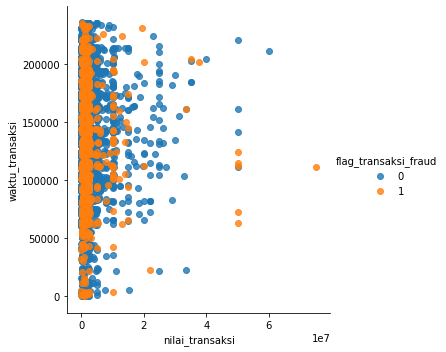

In [8]:
sns.lmplot(x='nilai_transaksi', y='waktu_transaksi', hue ='flag_transaksi_fraud', data =dfTrain, fit_reg = False)

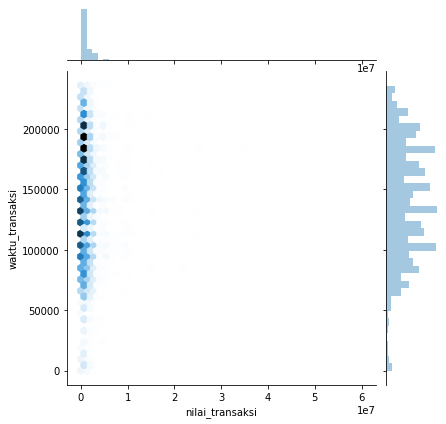

In [9]:
sns.jointplot(x='nilai_transaksi', y='waktu_transaksi', data= dfTrain[dfTrain['flag_transaksi_fraud'] == 0], kind = 'hex')

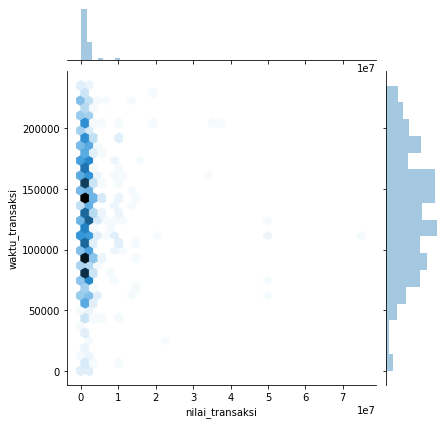

In [10]:
sns.jointplot(x='nilai_transaksi', y='waktu_transaksi', data= dfTrain[dfTrain['flag_transaksi_fraud'] == 1], kind = 'hex')

In [11]:
dfTrain['selisih_nilai_transaksi_rata_rata'] = dfTrain.apply(lambda x: x['nilai_transaksi'] - x['rata_rata_nilai_transaksi'], axis =1)

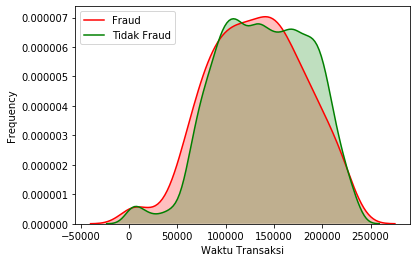

In [12]:
g = sns.kdeplot(dfTrain[(dfTrain['flag_transaksi_fraud'] ==1)]['waktu_transaksi'], color = 'red', shade = True)
g = sns.kdeplot(dfTrain[(dfTrain['flag_transaksi_fraud'] ==0)]['waktu_transaksi'], color = 'green', shade = True)
plt.legend(['Fraud', 'Tidak Fraud'])
plt.xlabel('Waktu Transaksi')
plt.ylabel('Frequency')
plt.show()

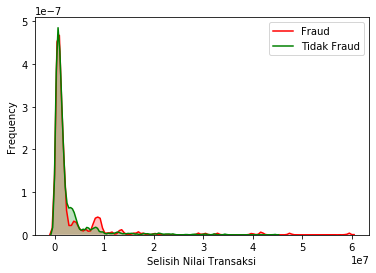

In [13]:
g = sns.kdeplot(dfTrain[(dfTrain['flag_transaksi_fraud'] == 1) &
       (dfTrain['selisih_nilai_transaksi_rata_rata'] > 0.5 * dfTrain['rata_rata_nilai_transaksi'])]
                ['selisih_nilai_transaksi_rata_rata'], color = 'red', shade = True)
g = sns.kdeplot(dfTrain[(dfTrain['flag_transaksi_fraud'] == 0) &
       (dfTrain['selisih_nilai_transaksi_rata_rata'] > 0.5 * dfTrain['rata_rata_nilai_transaksi'])]
                ['selisih_nilai_transaksi_rata_rata'], color = 'green', shade = True)
plt.legend(['Fraud', 'Tidak Fraud'])
plt.xlabel('Selisih Nilai Transaksi')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0, 'Waktu Transaksi')

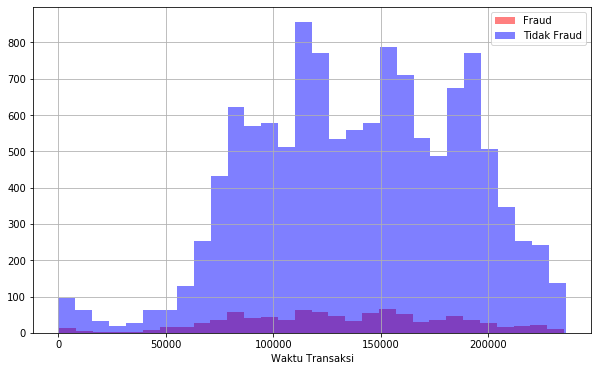

In [14]:
plt.figure(figsize = (10,6))

dfTrain[(dfTrain['flag_transaksi_fraud'] == 1)]['waktu_transaksi'].hist(alpha = 0.5, color = 'red', bins =30, label = 'Fraud')
dfTrain[(dfTrain['flag_transaksi_fraud'] == 0)]['waktu_transaksi'].hist(alpha = 0.5, color = 'blue', bins =30, 
                                                                        label = 'Tidak Fraud')
plt.legend()
plt.xlabel('Waktu Transaksi')

Text(0.5, 0, 'Selisiih Nilai Transaksi')

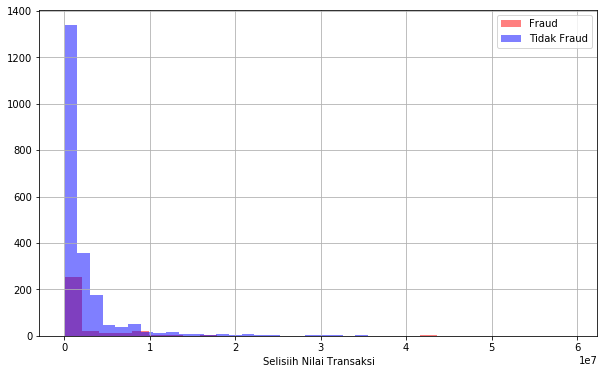

In [15]:
plt.figure(figsize = (10,6))

dfTrain[(dfTrain['flag_transaksi_fraud'] == 1) &
       (dfTrain['selisih_nilai_transaksi_rata_rata'] > 0.5 * dfTrain['rata_rata_nilai_transaksi'])][
    'selisih_nilai_transaksi_rata_rata'].hist(alpha = 0.5, color = 'red', bins =30, label = 'Fraud')
dfTrain[(dfTrain['flag_transaksi_fraud'] == 0)&
       (dfTrain['selisih_nilai_transaksi_rata_rata'] > 0.5 * dfTrain['rata_rata_nilai_transaksi'])][
    'selisih_nilai_transaksi_rata_rata'].hist(alpha = 0.5, color = 'blue', bins =30, 
                                                                        label = 'Tidak Fraud')
plt.legend()
plt.xlabel('Selisiih Nilai Transaksi')

In [16]:
matrix = []
for i in dfTrain['nama_kota'].unique():
    if len(dfTrain[dfTrain['nama_kota']==i]) >= 20:
        matrix.append([i, 
                       len(dfTrain[dfTrain['nama_kota']==i]), 
                       len(dfTrain[(dfTrain['nama_kota']==i) & (dfTrain['flag_transaksi_fraud'] == 1)]), 
                       len(dfTrain[(dfTrain['nama_kota']==i) & (dfTrain['flag_transaksi_fraud'] == 0)]), 
                       (len(dfTrain[(dfTrain['nama_kota']==i) & (dfTrain['flag_transaksi_fraud'] == 1)]))/ len(dfTrain[dfTrain['nama_kota'] == i])])

pd.DataFrame(matrix, columns = ['Kota', 'Banyak Transaksi', 'Banyak Fraud', 'Banyak Normal', 'Persentasi Fraud']).sort_values(by = 'Persentasi Fraud', ascending = False).head(10)    

,Kota,Banyak Transaksi,Banyak Fraud,Banyak Normal,Persentasi Fraud
43,51,20,11,9,0.550000
15,8,121,59,62,0.487603
37,93,26,7,19,0.269231
52,255,27,5,22,0.185185
40,152,85,14,71,0.164706
50,237,31,5,26,0.161290
14,57,32,4,28,0.125000
53,89,32,4,28,0.125000
41,221,50,6,44,0.120000
34,187,56,6,50,0.107143


In [17]:
matrix = []
for i in dfTrain['nama_negara'].unique():
    matrix.append([i, 
                   len(dfTrain[dfTrain['nama_negara']==i]), 
                   len(dfTrain[(dfTrain['nama_negara']==i) & (dfTrain['flag_transaksi_fraud'] == 1)]),
                  len(dfTrain[(dfTrain['nama_negara']==i) & (dfTrain['flag_transaksi_fraud'] == 0)]), 
                   (len(dfTrain[(dfTrain['nama_negara']==i) & (dfTrain['flag_transaksi_fraud'] == 1)]))/ len(dfTrain[dfTrain['nama_negara'] == i])])

pd.DataFrame(matrix, columns = ['Negara', 'Banyak Transaksi', 'Banyak Fraud', 'Banyak Normal', 'Persentasi Fraud']).sort_values(by = 'Persentasi Fraud', ascending = False)    

,Negara,Banyak Transaksi,Banyak Fraud,Banyak Normal,Persentasi Fraud
5,15,8,4,4,0.500000
2,16,9,4,5,0.444444
6,7,10,4,6,0.400000
4,11,3,1,2,0.333333
0,5,13080,897,12183,0.068578
1,14,1,0,1,0.000000
3,8,3,0,3,0.000000
7,12,1,0,1,0.000000
8,10,3,0,3,0.000000
9,6,5,0,5,0.000000


In [18]:
dfTrain['nama_kota'].unique()

array([265, 121, 101, 239,  69, 128, 241, 102,  70, 259, 229,  62,  37,
       167,  75, 273, 203,  57,   8,  86, 256,  60, 114,  71, 208, 293,
        58, 185, 223, 261, 244, 214,  91,  96, 186, 251, 153, 136, 191,
       189, 258, 134, 138, 266, 275, 205, 187, 249,  15, 218, 200, 209,
        93,  65, 155,   7, 152, 221,  72, 220, 206,  51, 165, 211, 132,
       175, 278, 119, 204, 169, 140, 150,   1,  56, 237, 288, 217, 127,
        43,  59, 141, 279, 231, 181,  81,  28, 143,  63, 210, 255, 197,
       253, 227,  89,   5, 113, 242, 243,  33, 281, 274, 112, 146,  79,
         4,  94, 126, 272,  92, 180, 154, 174, 107,  76, 260, 247, 284,
        64,  35, 135, 176, 166, 238,  77, 179, 213,  42, 222, 198, 108,
        11, 283, 109, 139, 159, 142, 100, 245,  55, 125,  99, 234, 240,
        73, 148,  52, 215, 188, 202,  74,  17,  27, 158,  41,  26,  78,
       235,  10, 248, 157,  84, 111,  87,  29, 173,  61, 250, 129, 257,
       144, 268,   3,  80, 161, 232,  13, 277,  50, 147, 225, 13

In [19]:
dfTrain['nama_kota'].nunique()

229

In [20]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['nama_kota'])
dfTrain = encoder.fit_transform(dfTrain)


In [21]:
dfTrain.tail()

,X,id_tanggal_transaksi_awal,tanggal_transaksi_awal,tipe_kartu,id_merchant,nama_merchant,tipe_mesin,tipe_transaksi,nama_transaksi,nilai_transaksi,id_negara,nama_negara,nama_kota_0,nama_kota_1,nama_kota_2,nama_kota_3,nama_kota_4,nama_kota_5,nama_kota_6,nama_kota_7,nama_kota_8,lokasi_mesin,pemilik_mesin,waktu_transaksi,kuartal_transaksi,kepemilikan_kartu,nama_channel,id_channel,flag_transaksi_finansial,status_transaksi,bank_pemilik_kartu,rata_rata_nilai_transaksi,maksimum_nilai_transaksi,minimum_nilai_transaksi,rata_rata_jumlah_transaksi,flag_transaksi_fraud,selisih_nilai_transaksi_rata_rata
13120,9482,2457523,2457583,111,-2,1798,1809533,385,11,100000.0,96,5,0,0,0,0,0,0,1,1,0,2259,613,140547,3,2,1,9,False,3,999,2.917987e+06,7400000.0,26500.0,2.57,0,-2.817987e+06
13121,6073,2457459,2457517,111,-2,1798,219609,26,10,2500000.0,96,5,0,0,0,0,0,0,1,1,0,4339,613,172446,3,2,1,9,False,3,999,1.914437e+06,20000000.0,100000.0,2.73,0,5.855633e+05
13122,12164,2457620,2457712,103,-2,1798,-3,156,12,1250000.0,96,5,0,1,0,1,1,1,0,0,0,7729,617,141836,3,1,5,8,False,3,999,3.417045e+05,1000000.0,100000.0,1.33,1,9.082955e+05
13123,5264,2457514,2457526,111,-2,1798,3067053,26,10,500000.0,96,5,0,0,0,0,0,0,1,1,0,8032,613,71451,2,2,1,9,False,3,999,7.644508e+05,3000000.0,25000.0,1.62,0,-2.644508e+05
13124,7335,2457426,2457522,103,-2,1798,2117453,301,16,300000.0,96,5,0,0,0,0,0,0,1,1,0,3061,613,175350,3,2,1,9,False,3,999,8.483696e+05,6375000.0,25000.0,1.79,0,-5.483696e+05


In [22]:
dfTrain.drop('nama_kota_0', axis =1, inplace = True)

In [23]:
dfTrain.dropna(inplace = True)
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13104 entries, 0 to 13124
Data columns (total 36 columns):
X                                    13104 non-null int64
id_tanggal_transaksi_awal            13104 non-null int64
tanggal_transaksi_awal               13104 non-null int64
tipe_kartu                           13104 non-null int64
id_merchant                          13104 non-null int64
nama_merchant                        13104 non-null int64
tipe_mesin                           13104 non-null int64
tipe_transaksi                       13104 non-null int64
nama_transaksi                       13104 non-null int64
nilai_transaksi                      13104 non-null float64
id_negara                            13104 non-null int64
nama_negara                          13104 non-null int64
nama_kota_1                          13104 non-null int64
nama_kota_2                          13104 non-null int64
nama_kota_3                          13104 non-null int64
nama_kota_4        

## K-Fold

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score, f1_score, log_loss, matthews_corrcoef

In [30]:
data = dfTrain.drop(['flag_transaksi_fraud', 'X'], axis =1)
target = dfTrain['flag_transaksi_fraud']

In [50]:
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions, average ='macro')
    report = classification_report(y_train, predictions)
    roc_auc = roc_auc_score(y_train, predictProba[:, 1])
    accuracy = accuracy_score(y_train, predictions)
    confMatrix = confusion_matrix(y_train, predictions)
    logloss = log_loss(y_train,predictProba)
    return{
        'report' : report, 
        'matthew' : matt,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss' : logloss
    }

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, average ='macro')
    report = classification_report(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictProba[:, 1])
    accuracy = accuracy_score(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    logloss = log_loss(y_test,predictProba)
    return{
        'report' : report, 
        'matthew' : matt,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss' : logloss
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [27]:
from sklearn.model_selection import KFold
K = 5
kf =KFold(n_splits = K, shuffle = True, random_state = 42)

In [31]:
hasilfold = list(kf.split(data, target))

In [32]:
hasilfold

[(array([    1,     2,     4, ..., 13100, 13101, 13103]),
  array([    0,     3,     8, ..., 13092, 13097, 13102])),
 (array([    0,     1,     2, ..., 13098, 13101, 13102]),
  array([   10,    12,    20, ..., 13099, 13100, 13103])),
 (array([    0,     1,     2, ..., 13101, 13102, 13103]),
  array([   15,    26,    27, ..., 13083, 13086, 13098])),
 (array([    0,     1,     3, ..., 13101, 13102, 13103]),
  array([    2,     6,     7, ..., 13093, 13094, 13096])),
 (array([    0,     2,     3, ..., 13100, 13102, 13103]),
  array([    1,     4,     5, ..., 13087, 13090, 13101]))]

In [33]:
len(hasilfold[0][0])

10483

In [34]:
len(hasilfold[0][1])

2621

In [51]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    #split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #instantiate model
    logmodel = LogisticRegression()
    
    #calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, logmodel)
    
    #append to appropiate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MSI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

In [52]:
train_errors

[{'report': '              precision    recall  f1-score   support\n\n           0       0.93      1.00      0.96      9752\n           1       0.53      0.01      0.02       731\n\n    accuracy                           0.93     10483\n   macro avg       0.73      0.51      0.49     10483\nweighted avg       0.90      0.93      0.90     10483\n',
  'matthew': 0.07273937798451637,
  'f1': 0.4939788656584406,
  'roc': 0.7041719457876823,
  'accuracy': 0.9303634455785558,
  'confusion': array([[9744,    8],
         [ 722,    9]], dtype=int64),
  'logloss': 0.23506536901274086},
 {'report': '              precision    recall  f1-score   support\n\n           0       0.93      1.00      0.96      9768\n           1       0.53      0.01      0.03       715\n\n    accuracy                           0.93     10483\n   macro avg       0.73      0.51      0.50     10483\nweighted avg       0.90      0.93      0.90     10483\n',
  'matthew': 0.07743326345929145,
  'f1': 0.49597866384813544,
  '

In [53]:
for i, tr_err, val_err in zip(range(1,6,1), train_errors, validation_errors):
    print('ROC AUC Train ke {} : {}'.format(i, tr_err['roc']))
    print('ROC AUC Validation ke {} : {}'.format(i, val_err['roc']))

ROC AUC Train ke 1 : 0.7041719457876823
ROC AUC Validation ke 1 : 0.6962341571530547
ROC AUC Train ke 2 : 0.7065245156154247
ROC AUC Validation ke 2 : 0.7099844893140983
ROC AUC Train ke 3 : 0.7151390075848523
ROC AUC Validation ke 3 : 0.669963515369931
ROC AUC Train ke 4 : 0.7004767215419433
ROC AUC Validation ke 4 : 0.7201117611564395
ROC AUC Train ke 5 : 0.7024441711177818
ROC AUC Validation ke 5 : 0.7157741347905282


In [54]:
for i, tr_err, val_err in zip(range(1,6,1), train_errors, validation_errors):
    print('Accuracy Train ke {} : {}'.format(i, tr_err['accuracy']))
    print('Accuracy Validation ke {} : {}'.format(i, val_err['accuracy']))

Accuracy Train ke 1 : 0.9303634455785558
Accuracy Validation ke 1 : 0.9385730637161389
Accuracy Train ke 2 : 0.9318897262234094
Accuracy Validation ke 2 : 0.9320869896985883
Accuracy Train ke 3 : 0.9327482590861395
Accuracy Validation ke 3 : 0.9282716520412057
Accuracy Train ke 4 : 0.9329390441667461
Accuracy Validation ke 4 : 0.9286531858069439
Accuracy Train ke 5 : 0.9319916062571537
Accuracy Validation ke 5 : 0.9312977099236641


In [55]:
for i, tr_err, val_err in zip(range(1,6,1), train_errors, validation_errors):
    print(f'Report Train ke {i} :')
    print(tr_err['report'])
    print(f'Report Validation ke {i} :')
    print(val_err['report'])

Report Train ke 1 :
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      9752
           1       0.53      0.01      0.02       731

    accuracy                           0.93     10483
   macro avg       0.73      0.51      0.49     10483
weighted avg       0.90      0.93      0.90     10483

Report Validation ke 1 :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2458
           1       1.00      0.01      0.02       163

    accuracy                           0.94      2621
   macro avg       0.97      0.51      0.50      2621
weighted avg       0.94      0.94      0.91      2621

Report Train ke 2 :
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      9768
           1       0.53      0.01      0.03       715

    accuracy                           0.93     10483
   macro avg       0.73      0.51      0.50     10483
weighted 

In [56]:
train_errors

[{'report': '              precision    recall  f1-score   support\n\n           0       0.93      1.00      0.96      9752\n           1       0.53      0.01      0.02       731\n\n    accuracy                           0.93     10483\n   macro avg       0.73      0.51      0.49     10483\nweighted avg       0.90      0.93      0.90     10483\n',
  'matthew': 0.07273937798451637,
  'f1': 0.4939788656584406,
  'roc': 0.7041719457876823,
  'accuracy': 0.9303634455785558,
  'confusion': array([[9744,    8],
         [ 722,    9]], dtype=int64),
  'logloss': 0.23506536901274086},
 {'report': '              precision    recall  f1-score   support\n\n           0       0.93      1.00      0.96      9768\n           1       0.53      0.01      0.03       715\n\n    accuracy                           0.93     10483\n   macro avg       0.73      0.51      0.50     10483\nweighted avg       0.90      0.93      0.90     10483\n',
  'matthew': 0.07743326345929145,
  'f1': 0.49597866384813544,
  '

In [57]:
matrix = []
for i, j in zip(train_errors, validation_errors):
    matrix.append([i['accuracy'], j['accuracy'], i['roc'],
                   j['roc'], i['f1'], j['f1'], i['matthew'], j['matthew'], i['logloss'], j['logloss']])
calc_matrix = pd.DataFrame(matrix, columns = ['Train Accuracy', 
                                              'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC', 'Train F1 Score', 
                                'Test F1 Score', 'Train Matthews Corr Coef',
                                              'Test Matthews Corr Coef', 'Train Log Loss', 'Test Log Loss'])
average = []
for i in calc_matrix.columns:
    average.append(calc_matrix[i].mean())
    
average_mat = pd.DataFrame(average).transpose() 
average_mat.columns = ['Train Accuracy', 'Test Accuracy', 'Train ROC AUC', 'Test ROC AUC', 'Train F1 Score', 
                                'Test F1 Score', 'Train Matthews Corr Coef',
                       'Test Matthews Corr Coef' , 'Train Log Loss', 'Test Log Loss']
index_label = []
for i in range(1, len(calc_matrix)+1):
    index_label.append(f'{i} Iteration')
index_label.append('Average')    
calculation = pd.concat([calc_matrix, average_mat])
calculation.index = index_label
calculation
    

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Matthews Corr Coef,Test Matthews Corr Coef,Train Log Loss,Test Log Loss
1 Iteration,0.930363,0.938573,0.704172,0.696234,0.493979,0.496265,0.072739,0.107311,0.235065,0.215078
2 Iteration,0.931890,0.932087,0.706525,0.709984,0.495979,0.503903,0.077433,0.103216,0.230869,0.231796
3 Iteration,0.932748,0.928272,0.715139,0.669964,0.500364,0.486657,0.098299,0.018086,0.227471,0.245763
4 Iteration,0.932939,0.928653,0.700477,0.720112,0.495120,0.497026,0.080452,0.089504,0.229658,0.236599
5 Iteration,0.931992,0.931298,0.702444,0.715774,0.494696,0.493069,0.073796,0.066674,0.231394,0.229643
Average,0.931986,0.931777,0.705751,0.702414,0.496027,0.495384,0.080544,0.076958,0.230892,0.231776
